In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel(r"C:/Users/THARUNBALAAJE/Downloads/Datasets/Predictive Analysis.xlsx")

In [ ]:
print(df.head(5))

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
x = df[['Experience (Years)']]   
y = df['Salary (in ₹)']
print(x)
print(y)

In [ ]:
# Convert to numeric, coerce errors to NaN, then drop NaNs for valid correlation calculation
x_numeric = pd.to_numeric(x['Experience (Years)'], errors='coerce')
y_numeric = pd.to_numeric(y, errors='coerce')

# Drop rows where either x or y is NaN
mask = (~x_numeric.isna()) & (~y_numeric.isna())
correlation = np.corrcoef(x_numeric[mask], y_numeric[mask])[0, 1]
print("Correlation", correlation)

In [ ]:
# Prepare X and y
t = df[['Experience (Years)', 'Performance_Score']]   # Two features
o = df['Salary (in ₹)']                  # Target variable

# Train the model
model = LinearRegression()
model.fit(t, o)

# Predict salary for 5 years experience and score 80
new_data = np.array([[8, 88]])
predicted_salary = model.predict(new_data)

print("Predicted Salary:", predicted_salary[0])

In [ ]:
# Compare predicted salary with actual salary for the multi-feature model
comparison_df = pd.DataFrame({
    'Actual Salary': y,
    'Predicted Salary': model.predict(X)
})
print(comparison_df)

In [ ]:
# Calculate R^2 score (coefficient of determination) for the model
r2_score = model.score(X, y)
print(f"Model R^2 score: {r2_score:.4f}")

In [ ]:
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(comparison_df['Actual Salary'], comparison_df['Predicted Salary'], color='blue', label='Predicted vs Actual')
plt.plot([comparison_df['Actual Salary'].min(), comparison_df['Actual Salary'].max()],
         [comparison_df['Actual Salary'].min(), comparison_df['Actual Salary'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

In [ ]:
# Predict salary for the worst performer (lowest Performance_Score) with 9 years of experience
min_score = X['Performance_Score'].min()
input_data = np.array([[9, min_score]])
predicted_worst_salary = model.predict(input_data)[0]
print(f"Predicted salary for worst performer with 9 years of experience (score {min_score}): ₹{predicted_worst_salary:.2f}")

In [ ]:
# Predict salary for a new intern with 0.5 years experience and score 50
intern_data = np.array([[0.5, 50]])
predicted_intern_salary = model.predict(intern_data)[0]
print(f"Predicted salary for new intern (0.5 years experience, score 50): ₹{predicted_intern_salary:.2f}")

In [ ]:
# Calculate the increase in salary for a 10-point increase in Performance_Score
performance_coef = model.coef_[1]  # Coefficient for Performance_Score
salary_increase = performance_coef * 10
print(f"Salary will increase by ₹{salary_increase:.2f} for a 10-point increase in Performance_Score.")

In [ ]:
# The impact of a one-year increase in experience on salary is given by the coefficient for 'Experience (Years)'
experience_coef = model.coef_[0]  # Coefficient for 'Experience (Years)'
print(f"Salary will increase by ₹{experience_coef:.2f} for each additional year of experience.")

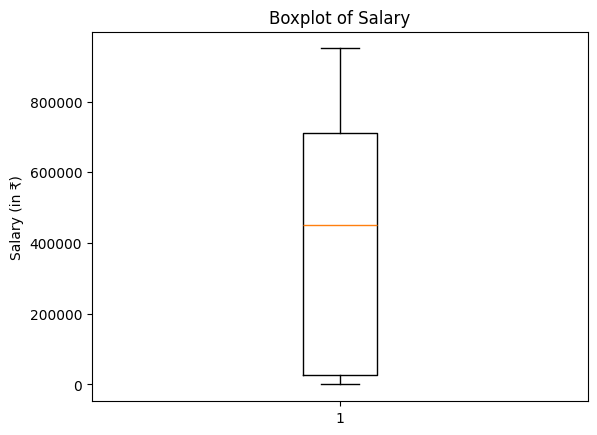

In [52]:
plt.boxplot(y_numeric.dropna())
plt.title('Boxplot of Salary')
plt.ylabel('Salary (in ₹)')
plt.show()

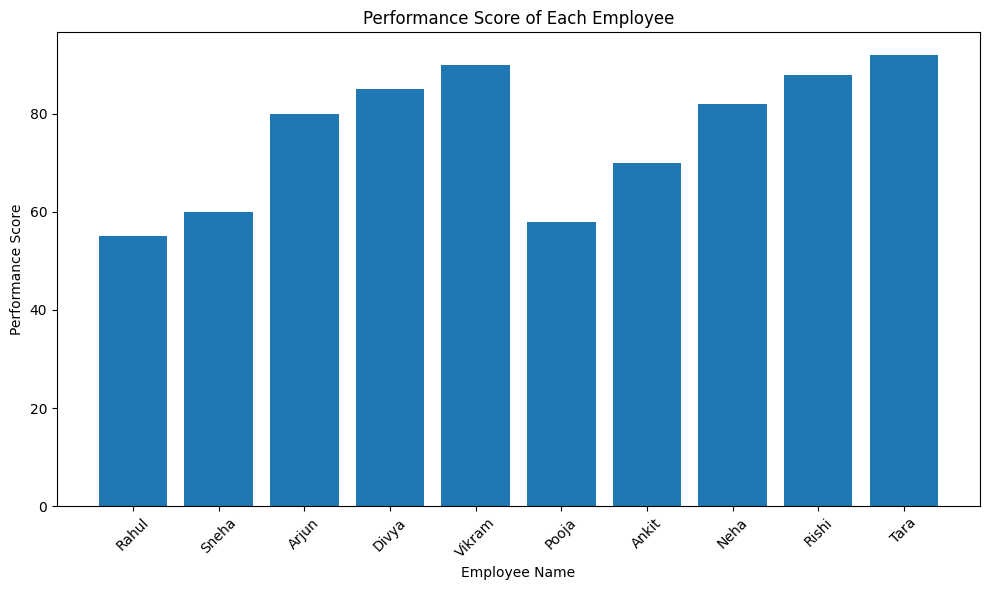

In [53]:
# Plot Performance_Score for each employee with a valid name
plt.figure(figsize=(10, 6))
employee_names = df['Emp_Name'].dropna()
performance_scores = pd.to_numeric(df.loc[df['Emp_Name'].notna(), 'Performance_Score'], errors='coerce')

plt.bar(employee_names, performance_scores)
plt.xlabel('Employee Name')
plt.ylabel('Performance Score')
plt.title('Performance Score of Each Employee')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

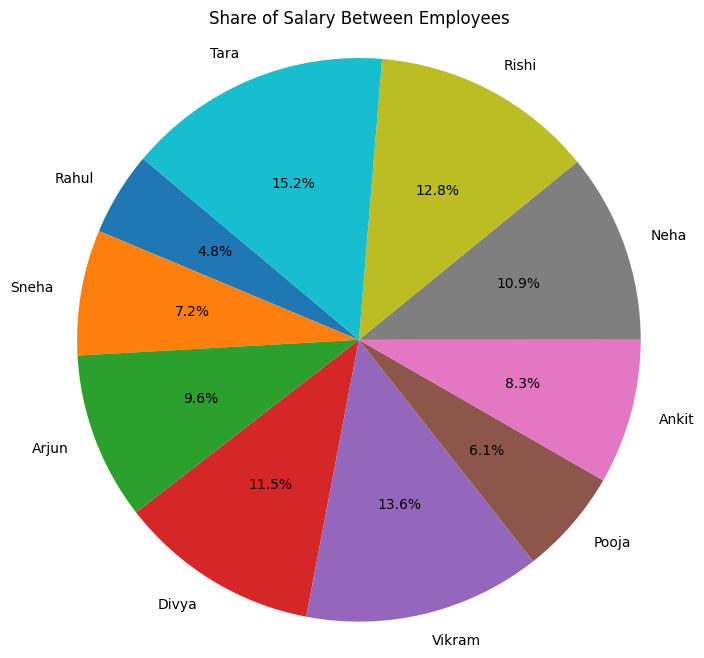

In [54]:
# Pie chart of salary share between employees with valid names and salaries
valid_employees = df[df['Emp_Name'].notna() & df['Salary (in ₹)'].notna()]
salaries = pd.to_numeric(valid_employees['Salary (in ₹)'], errors='coerce')
names = valid_employees['Emp_Name']

plt.figure(figsize=(8, 8))
plt.pie(salaries, labels=names, autopct='%1.1f%%', startangle=140)
plt.title('Share of Salary Between Employees')
plt.axis('equal')
plt.show()